# Open boundary conditions which mimic an infinite domain in $\mathtt{divand}$

## General idea

Manipulate the metrics of the boxes surrounding an open sea such that the applied boundary condition is artifically pushed further away, similar to the idea of absorbing boundary conditions. Criteria for success: The analysis with data points in the center should not be different if the open boundary is 1 or 20 length scales away. 

Mathematical criteria (need to show it is close to the desired property from above): The background variance field should be as uniform as possible and not increase near the open boundary (as it currently does with the zero normal gradient condition).

### 1D testing

First tests reveal that a good way to adapt the metrics $p_m$ near the boundaries is to fix values such that $l p_m \sim 1$ where $l$ is the local length scale. This amount to move the last grid point two length scales away in terms of metrics used in the numerical finite differences. (Note that the value of $p_m$ mentionned is the metric assiciated with the distance between the last two grid points, not the metric associated with the last grid point; this is useful to control also the position of the coordinates for data locations).

For example, testing for different values of $\alpha$ to calculate $p_m$=  $1 \over \alpha  l $ we observe a clear minimum in the variance of $\mathrm{diag} (\mathbf{B})$. If we use this value and look at the analysis with the adapted boundary condition and the analysis in a much larger domain, the differences are indeed very small.





indmin(vj) = 73
indmin(rj) = 58


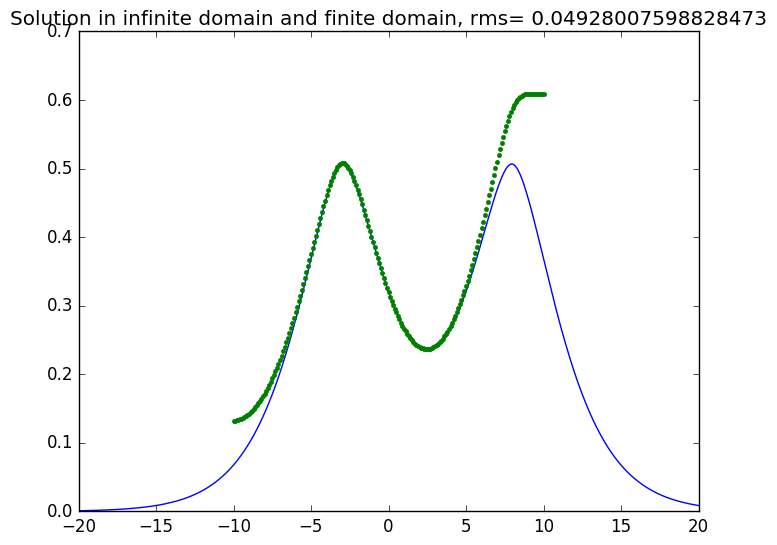

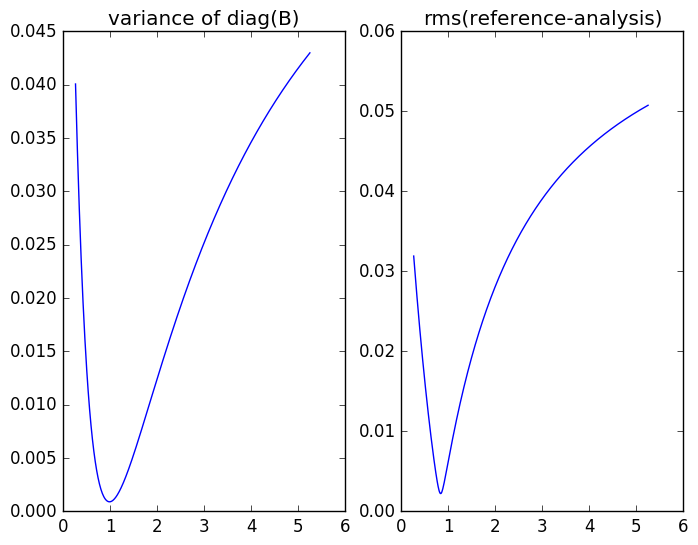

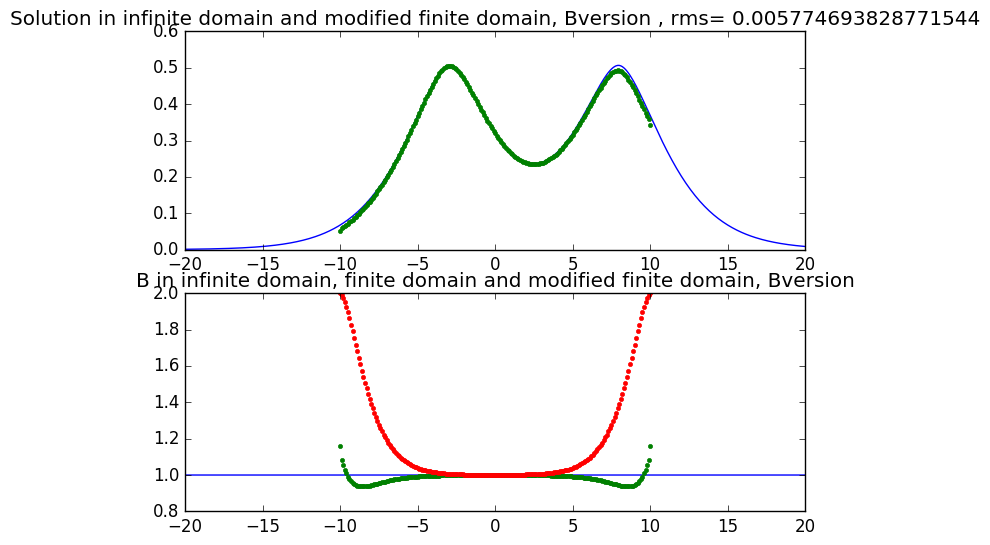

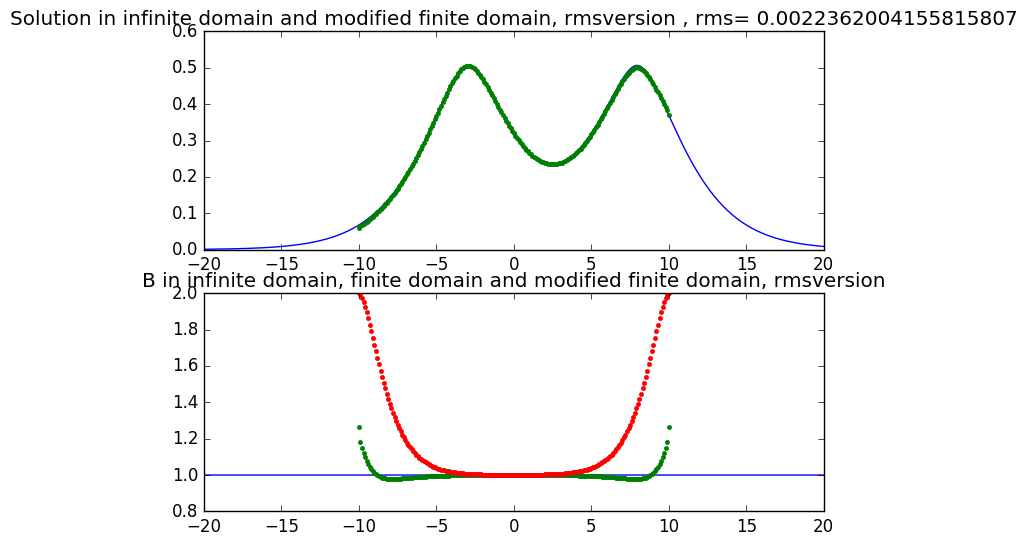

alen = 0.98
alen = 0.83


3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001D224898>
 PyObject <matplotlib.lines.Line2D object at 0x000000001D224B38>
 PyObject <matplotlib.lines.Line2D object at 0x000000001D22A3C8>

In [1]:
push!(LOAD_PATH,"C:/JMB/divand.jl/src"); using divand;cd("C:/JMB/divand.jl");cd("examples");include("divand_optimizepmn1Db.jl")

In practise the exact value for $\alpha$ is depending on the domain size $L$ and grid resolution compared to the length scales $l$.

Optimal $ \alpha $ as  a function of $L \over l$ (domain size $L$ over length scale $l$)  and resolution $ l p_m$ (length scale $l$ over grid spacing $1/p_m$). The optimal valueof  $\alpha$ is used to force the last and first metric to be $p_m$=  $1 \over \alpha  l $  

lpmc[5] = 

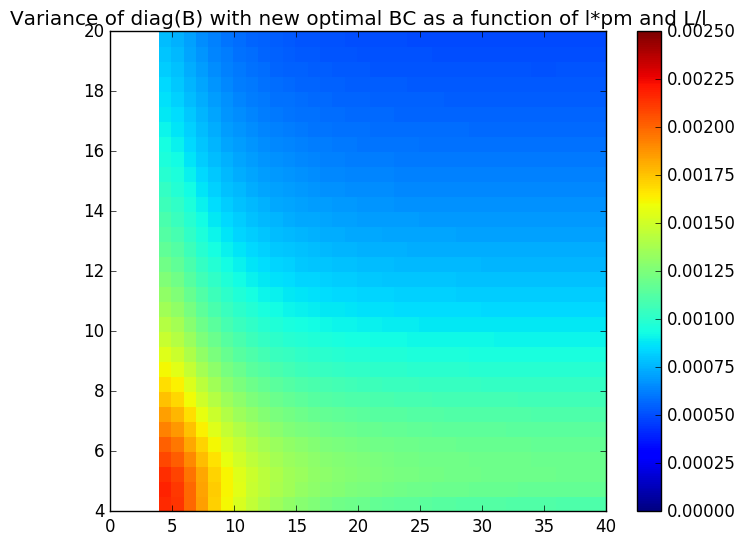

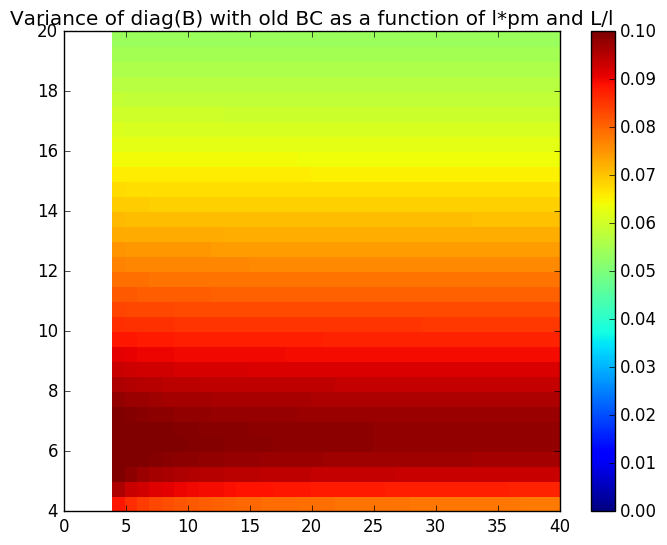

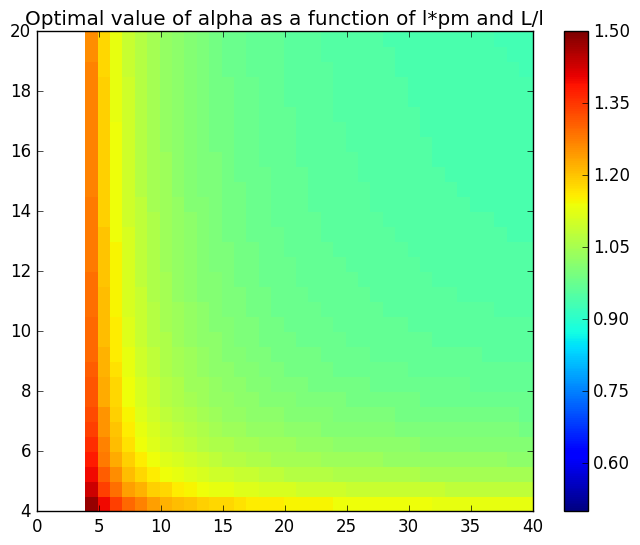

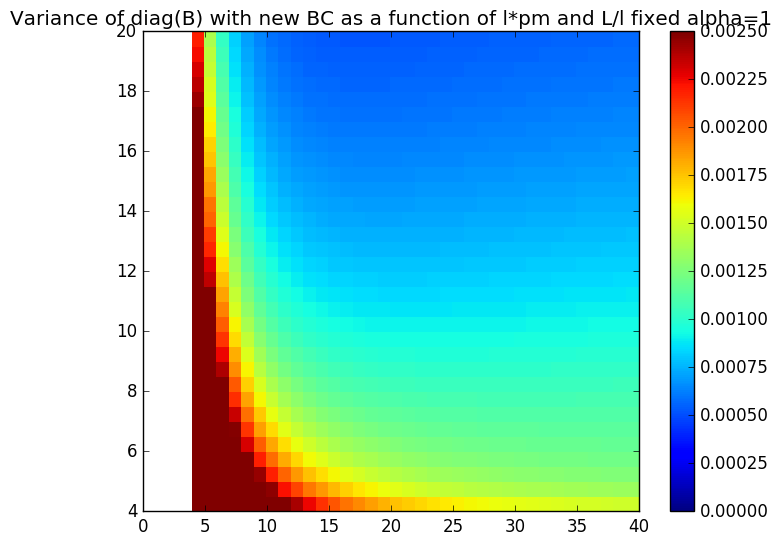

7.95
dsoverl[13] = 10.0
alpha[5,13] = 1.0899999999999999


In [2]:
include("divand_simple_example1poptimizepmn1D.jl")

### 2D verification

Here we take values of $L \over l$ and $l p_m$ likely to arise in the windowing approach so as to minimize boundary effects during the windowing. Then we verify that the value of $\alpha$ from the 1D case is also adapted for the 2D case. For ${L \over l}\sim 10$ and $lp_m \sim 8$, the optimal value of $\alpha$ from the 1D case is $\alpha=1.09$

len = 0.2001250781738587
2 / len = 9.993749999999999
pm[1,1] * len = 8.00500312695434
mean(Bnew) = 0.8996283007380295
mean(Bold) = 1.3525977516080139
sqrt(var(fiold - fi)) / sqrt(var(fiold - firef)) = 1.1935086888840793


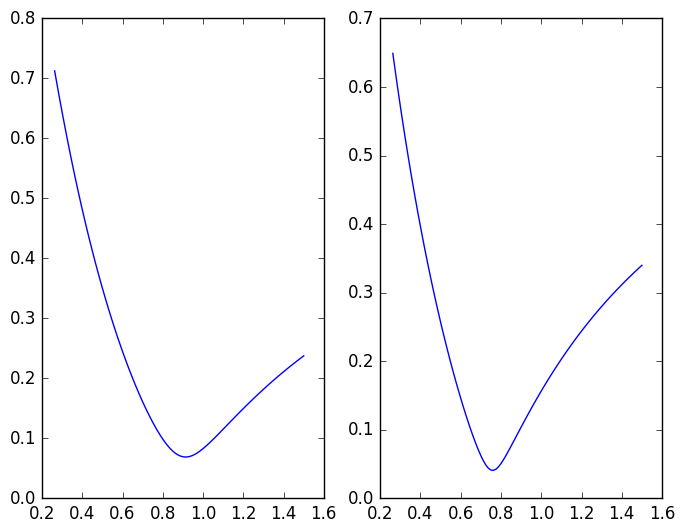

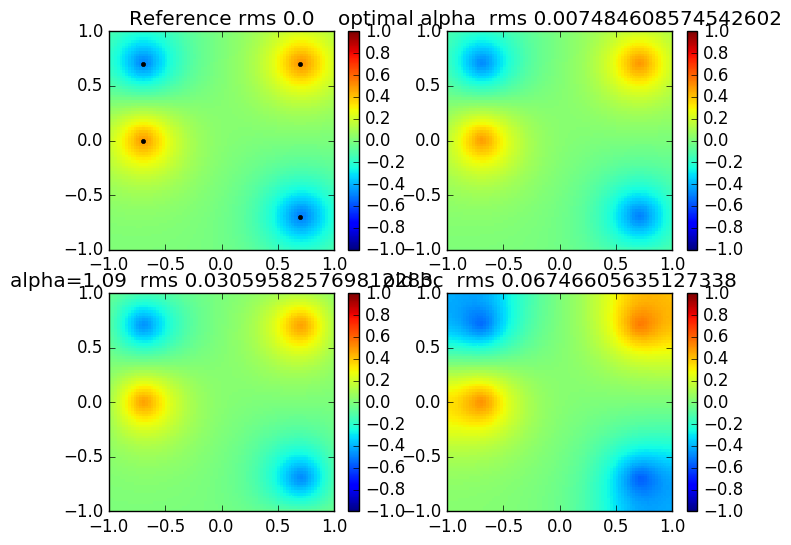

al[indmin(varr)] = 0.9125000000000001


In [3]:
include("divand_simple_example_bc2D.jl")                                        

### Check effect on $\mathtt{divandgo}$

106.525452 seconds (27.08 M allocations: 12.926 GB, 10.33% gc time)


Labsccut = (0.03,0.015)
k = 436


Labsccut = (0.03,0.015)
k = 436


Labsccut = (0.03,0.015)
k = 432


Labsccut = (0.03,0.015)
k = 425


Labsccut = (0.03,0.015)
k = 432


Labsccut = (0.03,0.015)
k = 432


Labsccut = (0.03,0.015)
k = 345


Labsccut = (0.03,0.015)
k = 326
232.772839 seconds (74.82 M allocations: 75.401 GB, 12.19% gc time)
104.611463 seconds (26.11 M allocations: 12.862 GB, 11.02% gc time)


Labsccut = (0.03,0.015)
k = 931


Labsccut = (0.03,0.015)
k = 908


Labsccut = (0.03,0.015)
k = 930


Labsccut = (0.03,0.015)
k = 886


Labsccut = (0.03,0.015)
k = 936


Labsccut = (0.03,0.015)
k = 898


Labsccut = (0.03,0.015)
k = 972


Labsccut = (0.03,0.015)


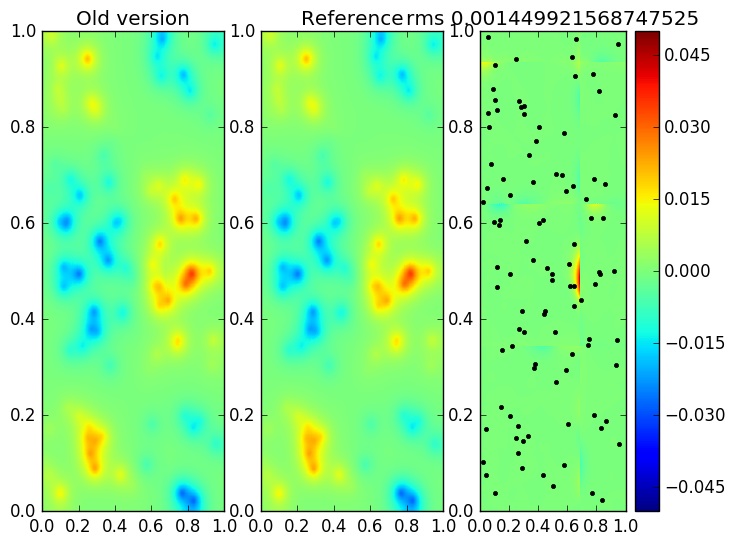

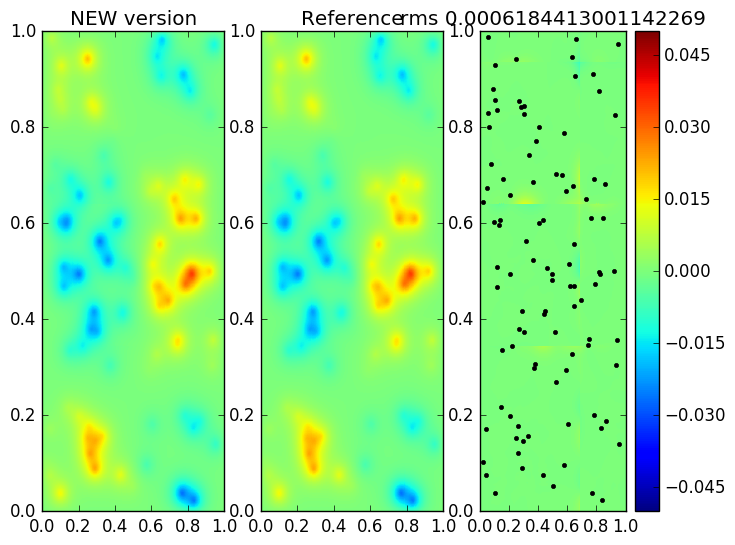

k = 919
301.450705 seconds (69.61 M allocations: 140.015 GB, 12.73% gc time)


PyObject <matplotlib.colorbar.Colorbar object at 0x000000007345A2E8>

In [4]:
include("divand_simple_example_go.jl")

## Implementation

Implemented within $\mathtt{divandrun}$ so that windowing can be done efficiently. In order to avoid copying a tuple, work at the level where the pmn's are actually used was preferred whenever possble? No, seems to be complicated ? The default value is $\alpha=1$. It always allows to force use of unmodified metrics by using $\mathtt{alphabc=0}$ in the argument list or any other value for different choices of $\alpha$. Now implemented in $\mathtt{divand\_bc\_stretch}$ in which not only the metrics are stretched but also the grid coordinates, assuming locally proportionallity between $\delta x$ and $1/p_m$.